In [1]:
# Dependencies
import numpy as np
import pandas as pd

import datetime as dt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [4]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

## D1: Determine the Summary Statistics for June

In [5]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 

results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==6).all()


In [6]:
# 3. Convert the June temperatures to a list.
# 4. Create a DataFrame from the list of temperatures for the month of June. 

june_temps_df = pd.DataFrame(results, columns=['Date','June Temps'])

print(june_temps_df)

# june_temps_df

            Date  June Temps
0     2010-06-01        78.0
1     2010-06-02        76.0
2     2010-06-03        78.0
3     2010-06-04        76.0
4     2010-06-05        77.0
...          ...         ...
1695  2017-06-26        79.0
1696  2017-06-27        74.0
1697  2017-06-28        74.0
1698  2017-06-29        76.0
1699  2017-06-30        75.0

[1700 rows x 2 columns]


In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.

june_temps_df.describe()


,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [8]:
# Export June DataFrame as csv file

june_temps_df.to_csv(r'/Users/Goki/Desktop/climate_analysis/surfs_up/june_temps_stats.csv')


In [9]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

from scipy.stats import norm

<IPython.core.display.Javascript object>


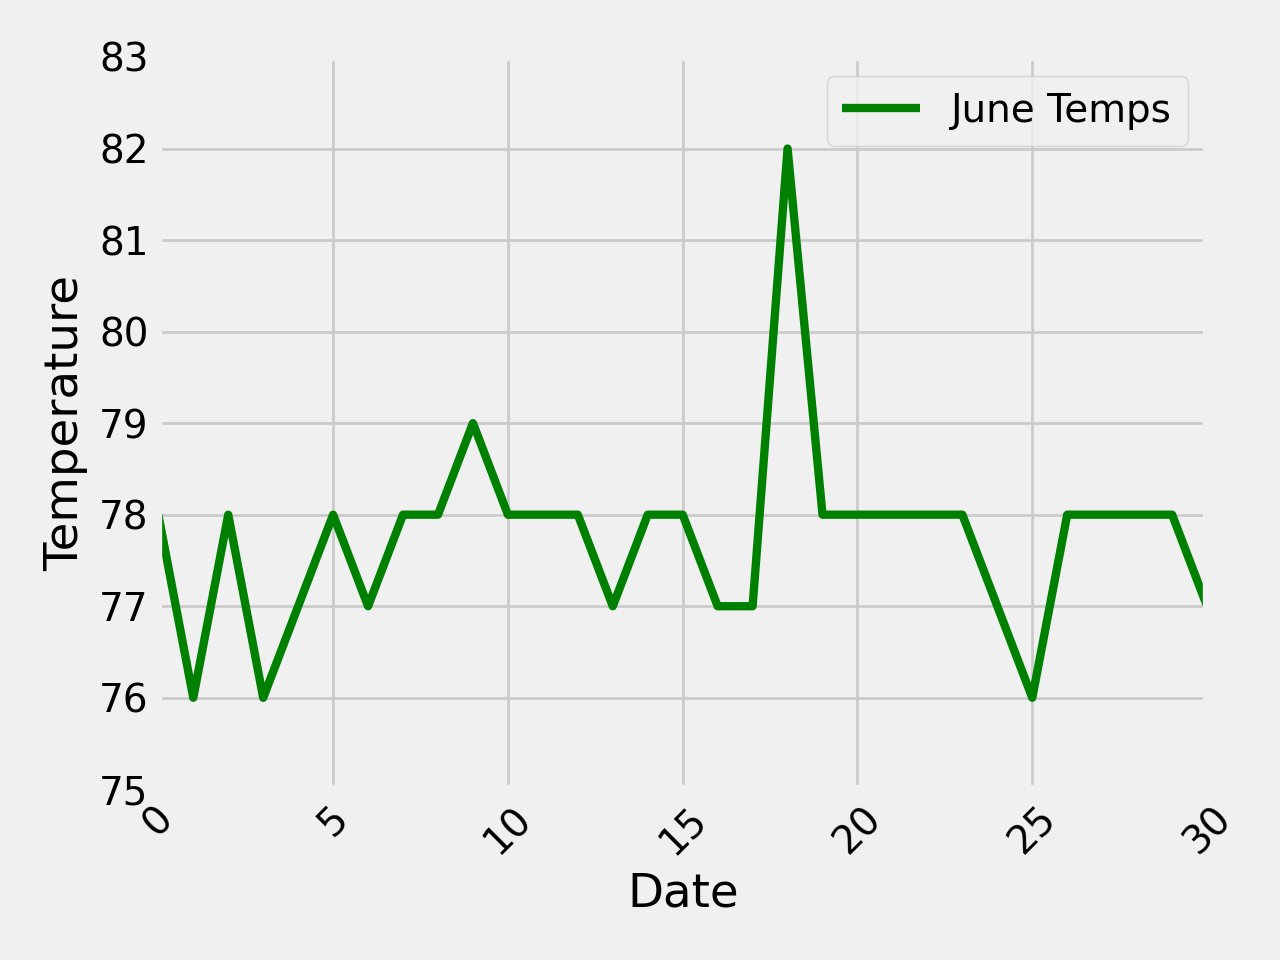

In [10]:
# Use Pandas Plotting with Matplotlib to plot the data
# Rotate the xticks for the dates
june_temps_df.plot(color="green", linewidth=3)
plt.xlim(0,30)
plt.ylim(75,83)
#plt.figure(figsize=3,10))
plt.ylabel("Temperature")
plt.xlabel("Date")
plt.xticks(rotation='45')
plt.tight_layout()

plt.savefig('/Users/Goki/Desktop/climate_analysis/surfs_up/june_temps.png')
plt.show()

## D2: Determine the Summary Statistics for December

In [11]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.

results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==12).all()


In [12]:
# 7. Convert the December temperatures to a list.
# 8. Create a DataFrame from the list of temperatures for the month of December. 

dec_temps_df = pd.DataFrame(results, columns=['Date','December Temps'])

#print(dec_temps_df)

dec_temps_df

,Date,December Temps
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0
...,...,...
1512,2016-12-27,71.0
1513,2016-12-28,71.0
1514,2016-12-29,69.0
1515,2016-12-30,65.0


In [13]:
# 9. Calculate and print out the summary statistics for the December temperature DataFrame.

dec_temps_df.describe()


,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [14]:
# Export December DataFrame as csv file

dec_temps_df.to_csv(r'/Users/Goki/Desktop/climate_analysis/surfs_up/dec_temps_stats.csv')


In [15]:


pd.to_datetime(dec_temps_df['Date'])



0      2010-12-01
1      2010-12-03
2      2010-12-04
3      2010-12-06
4      2010-12-07
          ...    
1512   2016-12-27
1513   2016-12-28
1514   2016-12-29
1515   2016-12-30
1516   2016-12-31
Name: Date, Length: 1517, dtype: datetime64[ns]

<IPython.core.display.Javascript object>


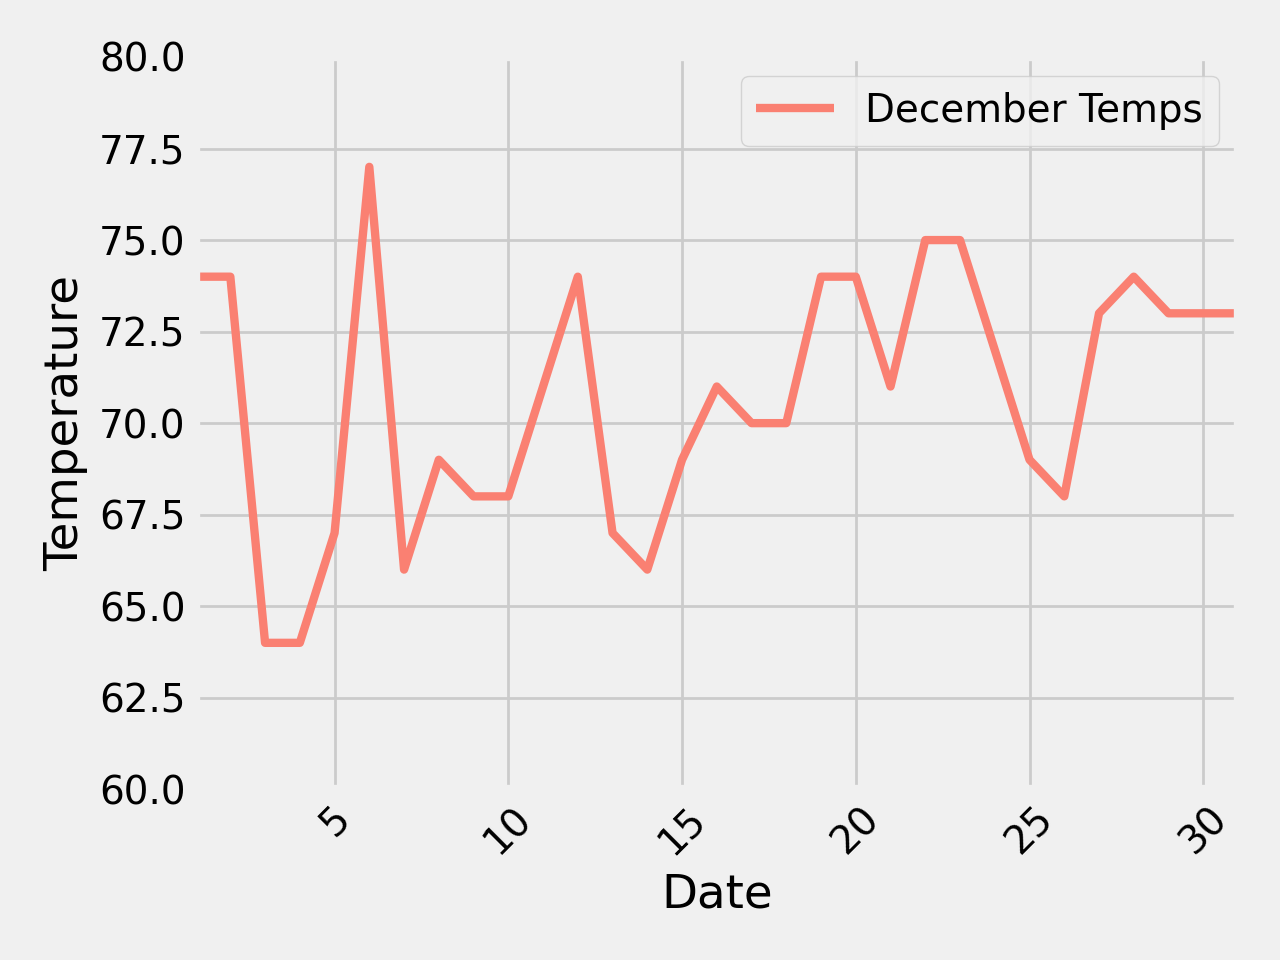

In [17]:
# Use Pandas Plotting with Matplotlib to plot the data
# Rotate the xticks for the dates
dec_temps_df.plot(color="salmon", linewidth=3)
plt.xlim(1,31)
plt.ylim(60,80)
plt.ylabel("Temperature")
plt.xlabel("Date")
plt.xticks(rotation='45')
plt.tight_layout()
plt.savefig('/Users/Goki/Desktop/climate_analysis/surfs_up/dec_temps_chart.png')
plt.show()

### Performed additional queries for produce other charts

In [ ]:
# set as an index

dec_df = dec_temps_df.set_index(pd.to_datetime(dec_temps_df['Date'])).drop('Date', axis=1)

dec_df

In [ ]:
# create a list with each year in the dataset
# note they must be of type str so you can loc search with them

years = [str(num) for num in range(2014, 2017)]

years

In [ ]:
# create a plot for each year by:
# loop through the list of years
# use each year to loc search the dataframe, slicing out that year only
# plot the resulting new DF for that year
# rinse and repeat

for year in years:
        dec_df.loc[year].plot()
        
# style and annotate your graphs as you see fit

#dec_df.plot(color="salmon", linewidth=2)
# plt.xlim(0, 31)
plt.ylabel("Temperature")
plt.xlabel("Date")
plt.xticks(rotation='45')
plt.tight_layout()
plt.savefig('/Users/Goki/Desktop/climate_analysis/surfs_up/june_dec_temps_chart.png')
plt.show()